# Understanding Descriptive Statistics

Import the necessary libraries here:

In [91]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [39]:
def dice():
    dice_df = pd.DataFrame(np.random.randint(1,7, size= 10), columns=['Number'])
    return dice_df

#### 2.- Plot the results sorted by value.

In [40]:
# Note: as discussed in the class, I am not plotting the results sorted by value, because the important
# part is creating the histogram (done in the following questions of the challenge below).


In [41]:
# Here I am just calling the function to generate the dataframe for the following exercises
dice_values = dice()
dice_values

,Number
0,1
1,5
2,4
3,4
4,1
5,6
6,1
7,6
8,4
9,2


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [42]:
# Frequency distribution:
dice_values.value_counts()

Number
1         3
4         3
6         2
2         1
5         1
dtype: int64

In [ ]:
# Note: The best plot to analyze the frequency distribution is the histogram. 
# I am however adding also the box plot for the different questions just to be able to compare 
# if there are any differences. 

array([[<AxesSubplot:title={'center':'Number'}>]], dtype=object)

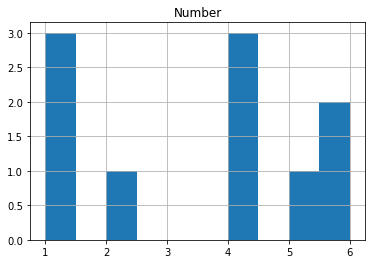

In [44]:
# First, I am creating the histogram:

dice_values.hist()

<AxesSubplot:>

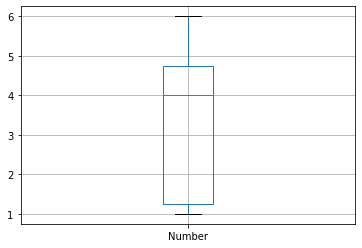

In [43]:
# This is just to compare:

dice_values.boxplot()

In [45]:
"""
Nothing to compare so far (the interesing comparison is versus the samples with 100 and 1000 values below).
However, so far we can see that because the sample is very small (10), the distribution across values
is uneven.
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [46]:
def mean_function(numbers):
    mean_val = np.sum(numbers)/len(numbers)
    return mean_val

mean_function(dice_values) 

Number    3.4
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [ ]:
# Note: I don't fully understand the difference between this exercise and the ones above (I have
# already calculated the frequency distribution and the mean, using a function). Thus, I am skipping
# this part because it is redundant.

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [73]:
# Note: because the number of elements in the list (10) is even, we have to calculate the mean between
# elements 5 and 6 (and because the df starts in value 0, we use values 4 and 5)
# We first sort the df by the column with the numbers, and sort also the index accordingly, so we can 
# then call the elements by index in the right order

def median_function(list):
    sorted = list.sort_values(by=['Number']).reset_index(drop=True)
    median_val = (sorted['Number'][4]+sorted['Number'][5]) / 2
    return median_val

median_function(dice_values)

4.0

In [87]:
# The function above assumes the list of items is always 10. This alternative below works for any list
# with an even number of values (not only 10). To also cover lists with an odd number of values, I would
# have to add and if/else condition.

def median_function(list):
    sorted = list.sort_values(by=['Number']).reset_index(drop=True)
    middle = (len(list))/2
    median_val = (sorted['Number'][middle -1]+sorted['Number'][middle+1]) / 2
    return median_val

median_function(dice_values)

4.0

In [68]:
sorted

,Number
0,1
1,1
2,1
3,2
4,4
5,4
6,4
7,5
8,6
9,6


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [75]:
# This works only if we know the length of the list (10 items), but we cannot reuse it for lists
# with different number of values. Therefore, I am adding an alternative below
def quartiles(list):
    sorted = list.sort_values(by=['Number']).reset_index(drop=True)
    middle = (len(list))/2
    q2 = (sorted['Number'][middle -1]+sorted['Number'][middle+1]) / 2
    q1 = sorted['Number'][2]
    q3 = sorted['Number'][7]
    return [q1, q2, q3]

quartiles(dice_values)

[1, 4, 5]

In [104]:
# Same as above, but without using the number of the index:

def quartile_one(list):
    sorted = list.sort_values(by=['Number']).reset_index(drop=True)
    k = len(sorted) // 4
    if len(sorted) % 4 <  2:
        q1 = (sorted['Number'][k-1] + sorted['Number'][k])/2
    else:
        q1 = sorted['Number'][k-1]
    return q1

# This works knowing that all lists we will use will have an even number of items. Otherwise, for odd
# lists we would have to make changes
def quartile_two(list):
    sorted = list.sort_values(by=['Number']).reset_index(drop=True)
    k = (len(sorted))/2
    q2 = (sorted['Number'][k -1]+sorted['Number'][k+1]) / 2
    return q2

def quartile_three(list):
    sorted = list.sort_values(by=['Number']).reset_index(drop=True)
    k = 3 * len(sorted) // 4
    if len(sorted) % 4 <  2:
        q3= (sorted['Number'][k] + sorted['Number'][k+1])/2
    else:
        q3= sorted['Number'][k]
    return q3

print (quartile_one(dice_values))
print (int(quartile_two(dice_values)))
print (quartile_three(dice_values))

1
4
5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [78]:
dice_hundred = pd.read_csv('/Users/mariagarcia/Desktop/labs/week4/Descriptive-Stats/data/roll_the_dice_hundred.csv')
dice_hundred.head(5)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


<AxesSubplot:>

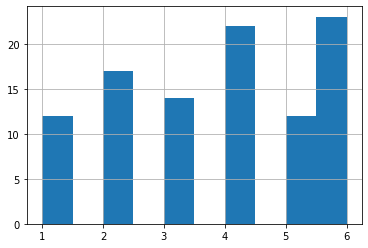

In [131]:
sorted_hundred = dice_hundred.sort_values(by=['value'])
sorted_hundred['value'].hist()

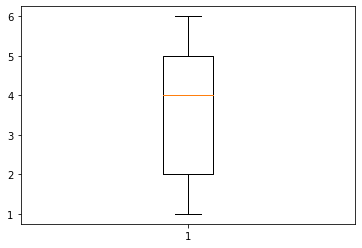

In [81]:
plt.boxplot(sorted_hundred['value'])
plt.show()

In [ ]:
"""
Looking at this histogram, the frequency distribution across the 6 values starts to be more even.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [107]:
# First I select the subset of the df where we have the info we need (value)
hundred_values = dice_hundred['value']

# Then I apply the function
def mean_function(numbers):
    mean_val = np.sum(numbers)/len(numbers)
    return mean_val

mean_function(hundred_values)

3.74

#### 3.- Now, calculate the frequency distribution.


In [133]:
hundred_values.value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

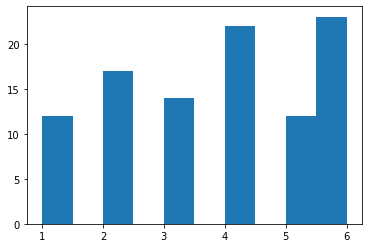

In [108]:
# Note: this was alredy done above. Repeating it here:

plt.hist(sorted_hundred['value'])
plt.show()

In [ ]:
"""
(Same comment as above: 
Compared to the sample with 10 items, the frequency distribution across the 6 values starts to be more even.)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [109]:
dice_thousand = pd.read_csv('/Users/mariagarcia/Desktop/labs/week4/Descriptive-Stats/data/roll_the_dice_thousand.csv')
dice_thousand.head(5)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


<AxesSubplot:>

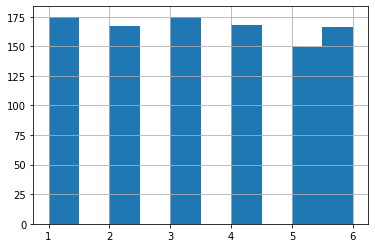

In [134]:
sorted_thousand = dice_thousand.sort_values(by=['value'])
sorted_thousand['value'].hist()

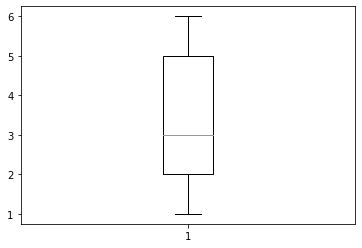

In [110]:
plt.boxplot(sorted_thousand['value'])
plt.show()

In [ ]:
"""
In this histogram we can see the distribution between all values is much more equal. 
As we increase the size of the sample, we can better see how the probability of each 
of the values being selected is the same.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [83]:
ages = pd.read_csv('/Users/mariagarcia/Desktop/labs/week4/Descriptive-Stats/data/ages_population.csv')
ages.head(5)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [111]:
ages.value_counts()

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

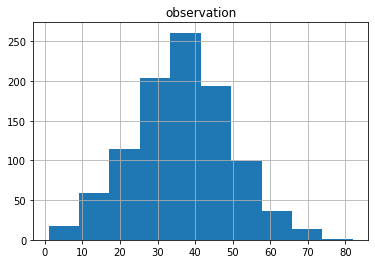

In [113]:
ages.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [116]:
ages.mean()

observation    36.56
dtype: float64

In [117]:
ages.std()

observation    12.8165
dtype: float64

In [ ]:
"""
The mean was close to my estimations (I estimated a range between 35 and 40 years old).
For the standard deviation it was a bit harder to estimate it with precision just by looking at the plot,
but I suspected it would have to be somewhere between 10 and 15.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [120]:
ages_2 = pd.read_csv('/Users/mariagarcia/Desktop/labs/week4/Descriptive-Stats/data/ages_population2.csv')

In [119]:
ages_2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

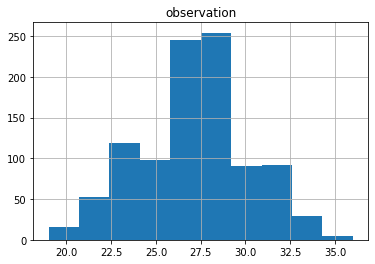

In [122]:
ages_2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
In step 1, the curve had more the shape of a normal distribution. However, in this case there are more
values in the middle of the curve (near the mean), and then the number of values decreases significantly
on both sides of the curve. 
Also, the range in step 1 was much larger, (from 10 to 70 years old), and therefore there
were many outliers above and below. In step 2 the range is smaller (20 to 35 years old).
Although not related to the frequency distribution, it is also worht mentioning that we can see than 
in step 2 the sample of the population interviewed was signifnicanty younger, which means the mean 
is lower.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [123]:
ages_2.mean()

observation    27.155
dtype: float64

In [124]:
ages_2.std()

observation    2.969814
dtype: float64

In [ ]:
"""
In step 2, the mean is much lower (27.2, compared to 36.6), as we could already guess by looking at the
plots. Also, because most values are concentrated in the middle of the curve (insted of being dispersed
and follow a normal distribution like in step 1), the standard deviation is much lower.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [125]:
ages_3 = pd.read_csv('/Users/mariagarcia/Desktop/labs/week4/Descriptive-Stats/data/ages_population3.csv')

In [126]:
ages_3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

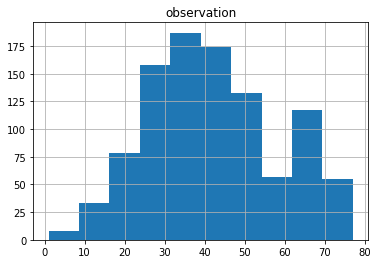

In [128]:
ages_3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [129]:
ages_3.mean()

observation    41.989
dtype: float64

In [130]:
ages_3.std()

observation    16.144706
dtype: float64

In [ ]:
"""
There is a high frequency of high values (people with ages 60 to 75 aprox.) The plot is skewed to
the right. Because of this, we can see that compared to the first exercise 
the mean in this case is higher (42 years old, versus 37), and the standard deviation
is also higher (as values are more spread).
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [137]:
q1 = np.quantile(ages_3, 0.25)
print ('the first quartile is', q1)

q2 = np.quantile(ages_3, 0.50) # this equals the median
print ('the second quartile is', q2)

q3 = np.quantile(ages_3, 0.75)
print ('the third quartile is', q3)

the first quartile is 30.0
the second quartile is 40.0
the third quartile is 53.0


In [ ]:
"""
The difference between the median (40) and the mean (42) in this case (distribution skewed to the right)
is slightly higher than in the first case (which is closer to a normal distribution). 
Also, because the distribution is skewed to the right, we see the median is lower than the mean.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [141]:
print(np.quantile(ages_3, 0.10))
print(np.quantile(ages_3, 0.90))

22.0
67.0


In [ ]:
"""
Above we can see the confirmation that the distribution is skewed to the right and it is an elder 
population. So, for example, the value 10% quantile is quite high (22 years old). 
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""